<a href="https://colab.research.google.com/github/NickKar30/GM-HSE-AI-masters-course/blob/main/base/Lecture1_NormFlows/Huggingface_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HuggingFace. Инференс моделей.

Библиотека 🤗 Transformers была разработана для упрощения работы с большими и сложными моделями трансформеров, которые обладают миллионами и даже десятками миллиардов параметров.

Она обеспечивает унифицированный интерфейс для загрузки, обучения и сохранения различных моделей трансформеров, что значительно упрощает их тестирование и развертывание.

* Основными преимуществами библиотеки являются ее простота в использовании, позволяющая в несколько строк кода запускать современные NLP-модели, и гибкость, благодаря интеграции с популярными фреймворками машинного обучения, как PyTorch и TensorFlow.
* Каждая модель в 🤗 Transformers реализована в виде отдельных классов, соответствующих этим фреймворкам, что делает код легким для понимания и модификации.
* Важной особенностью является также то, что вся логика модели сосредоточена в одном файле, облегчая эксперименты и модификации без влияния на другие модели, что отличает 🤗 Transformers от других библиотек машинного обучения.

In [ ]:
!pip install transformers datasets evaluate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


## Использование моделей из библиотеки transformers

Есть два пути использования моделей:

* Применение готовой, предобученной модели и мгновенное получение результата

* Обучение или дообучение модели из библиотеки на своих данных

Начнем с fast-track - применение готовой модели без дообучения, as is.

# 1. Пайплайны

В трансформерах есть множество предобученных моделей для самых разных типов задач. Чтобы применить предобученную модель к сырому тексту, можно использовать конструкцию под названием `pipeline`.

Pipeline сочетает в себе:

* токенизацию текста (при помощи предобученной модели)

* применение предобученной модели для решения поставленной задачи.

### Пример 1: распознавание именованных сущностей

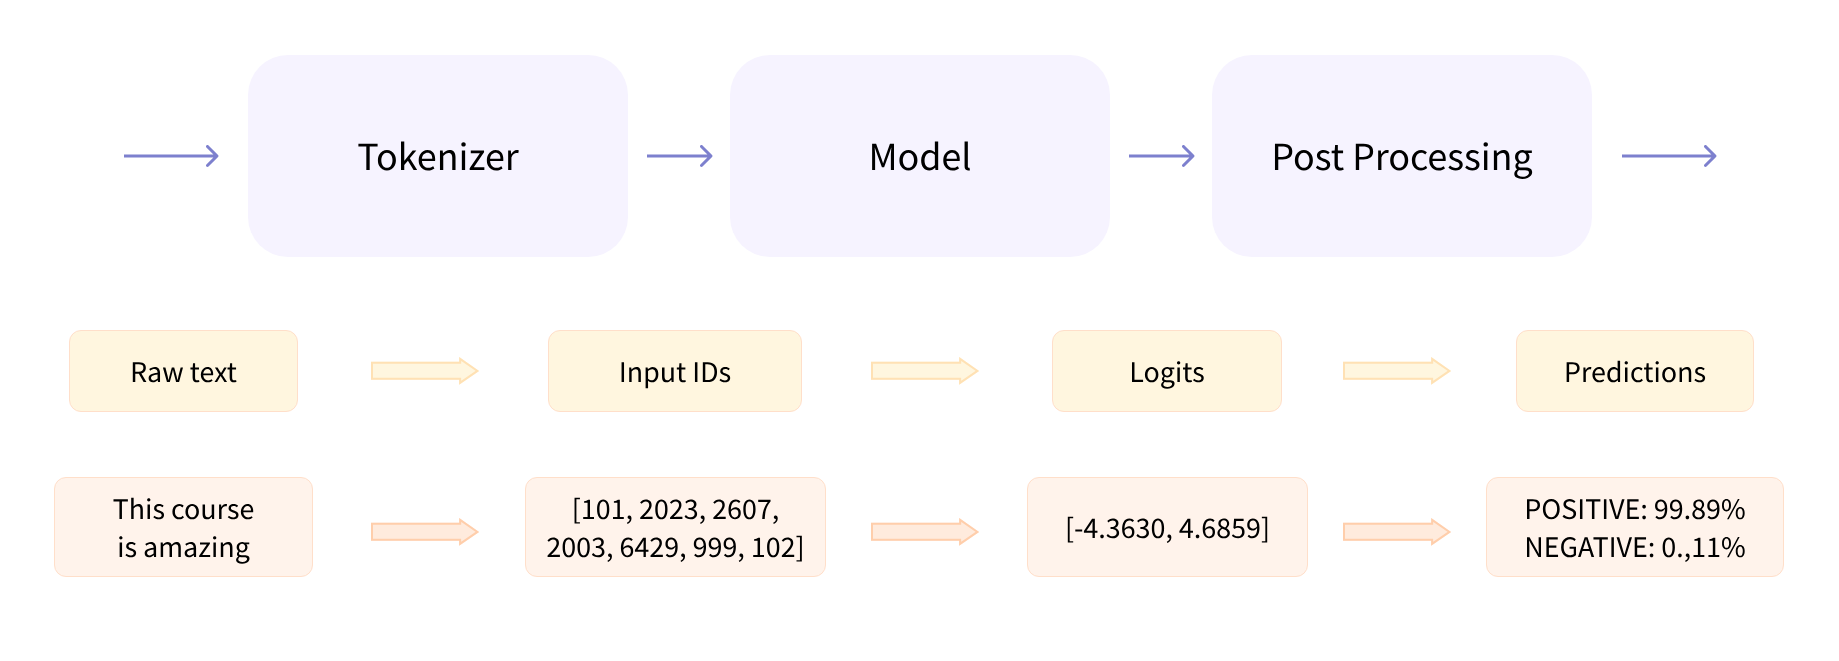

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity': 'B-PER', 'score': np.float32(0.9990139), 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': np.float32(0.999645), 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [ ]:
example = "Diana lives in Moscow for 15 years"

ner_results = nlp(example)
print(ner_results)

[{'entity': 'B-PER', 'score': np.float32(0.998906), 'index': 1, 'word': 'Diana', 'start': 0, 'end': 5}, {'entity': 'B-LOC', 'score': np.float32(0.99975497), 'index': 4, 'word': 'Moscow', 'start': 15, 'end': 21}]


Типы задач в пайплайне - [тут](https://huggingface.co/docs/transformers/en/main_classes/pipelines).

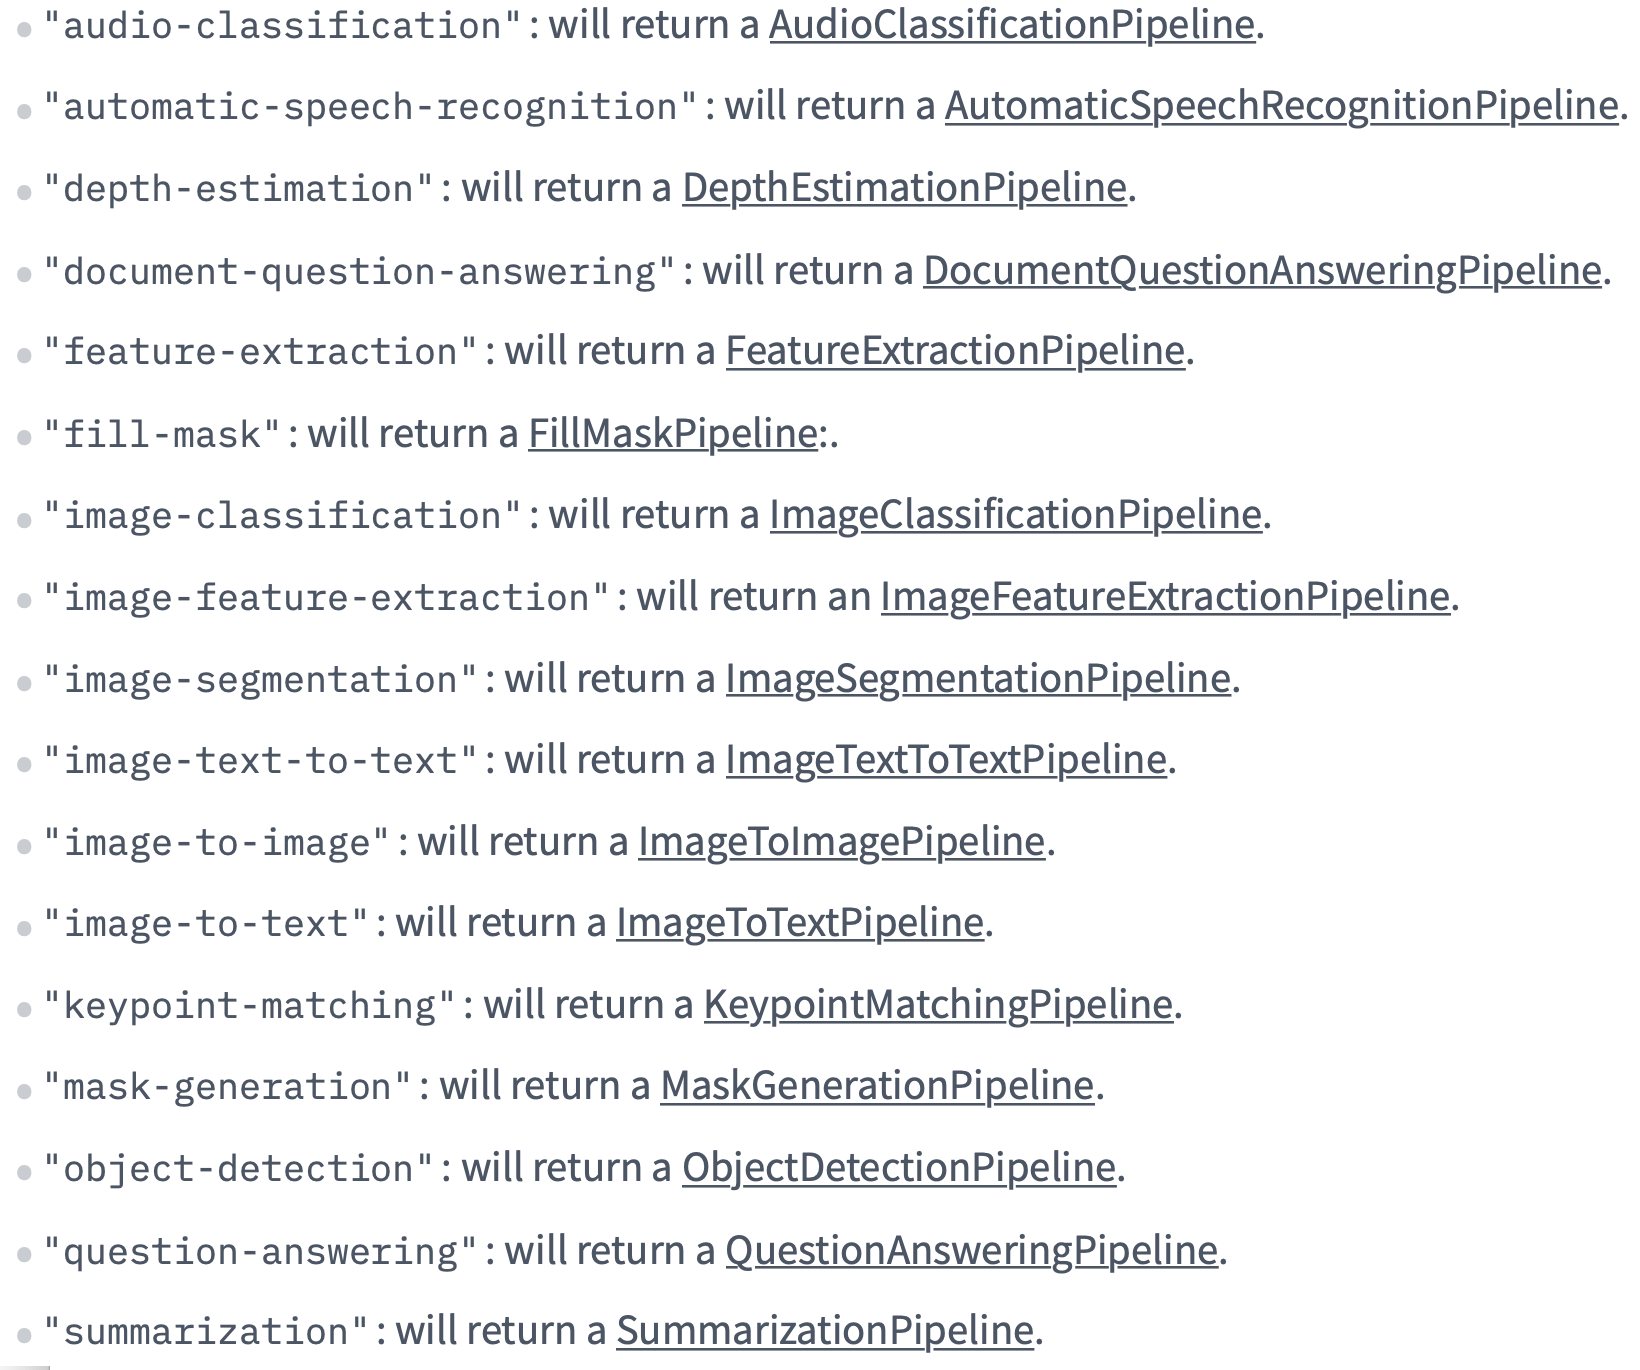

### Пример 2: классификация тональности

In [ ]:
# Allocate a pipeline for sentiment-analysis
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
classifier = pipeline("sentiment-analysis", model=model_id)

classifier('We are very happy to introduce pipeline to the transformers repository.')

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9877892732620239}]

In [ ]:
classifier("I'm sorry but this day is awful")

[{'label': 'negative', 'score': 0.932331383228302}]

### Пример 3: восстановление пропущенных слов

In [ ]:
mlm_model = pipeline('fill-mask', model="bert-base-uncased")
MASK = mlm_model.tokenizer.mask_token

for hypo in mlm_model(f"Donald {MASK} is the president of the united states."):
  print(f"P={hypo['score']:.5f}", hypo['sequence'])

# Your turn: use bert to recall what year was the Soviet Union founded in
mlm_model(f"Soviet Union was founded in the year {MASK}.")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


P=0.99719 donald trump is the president of the united states.
P=0.00024 donald duck is the president of the united states.
P=0.00022 donald ross is the president of the united states.
P=0.00020 donald johnson is the president of the united states.
P=0.00018 donald wilson is the president of the united states.


[{'score': 0.0393822081387043,
  'token': 4585,
  'token_str': '1917',
  'sequence': 'soviet union was founded in the year 1917.'},
 {'score': 0.0273779034614563,
  'token': 4271,
  'token_str': '1918',
  'sequence': 'soviet union was founded in the year 1918.'},
 {'score': 0.015172121115028858,
  'token': 4444,
  'token_str': '1920',
  'sequence': 'soviet union was founded in the year 1920.'},
 {'score': 0.014308754354715347,
  'token': 4878,
  'token_str': '1912',
  'sequence': 'soviet union was founded in the year 1912.'},
 {'score': 0.01420626137405634,
  'token': 5141,
  'token_str': '1900',
  'sequence': 'soviet union was founded in the year 1900.'}]

# 2. Что внутри пайплайна?

Теперь давайте разбираться подробнее с тем, какие этапы встроены в pipeline.

Посмотрим как применять предобученную модель Bert, а также как применять предобученный Bert-токенизатор.

`Cased` в названиях модели - важны большие/маленькие буквы. `Uncased` - неважны. Можно выбирать из [тысяч](https://huggingface.co/models) моделей - для разных задач и языков

In [ ]:
from transformers import BertConfig, BertModel
from transformers import BertTokenizer

# Создание конфигурации
config = BertConfig()
print(config)
# Создание модели на основе конфигурации
model = BertModel(config)

model = BertModel.from_pretrained("bert-base-cased")

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.56.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

### Токенизация

Токенизация играет ключевую роль в процессе обработки естественного языка (NLP), выполняя задачу превращения текста в формат, с которым могут работать машины. Поскольку модели способны интерпретировать только числовые данные, токенизаторы необходимы для трансформации текстовых данных в числа. В этом разделе мы подробно изучим, как происходит этот процесс токенизации.

В контексте NLP обычно работают с исходным текстом. Задача токенизатора — найти такой метод преобразования, который будет наиболее информативен и компактен для модели, обеспечивая при этом сохранение смысловой нагрузки исходного текста.

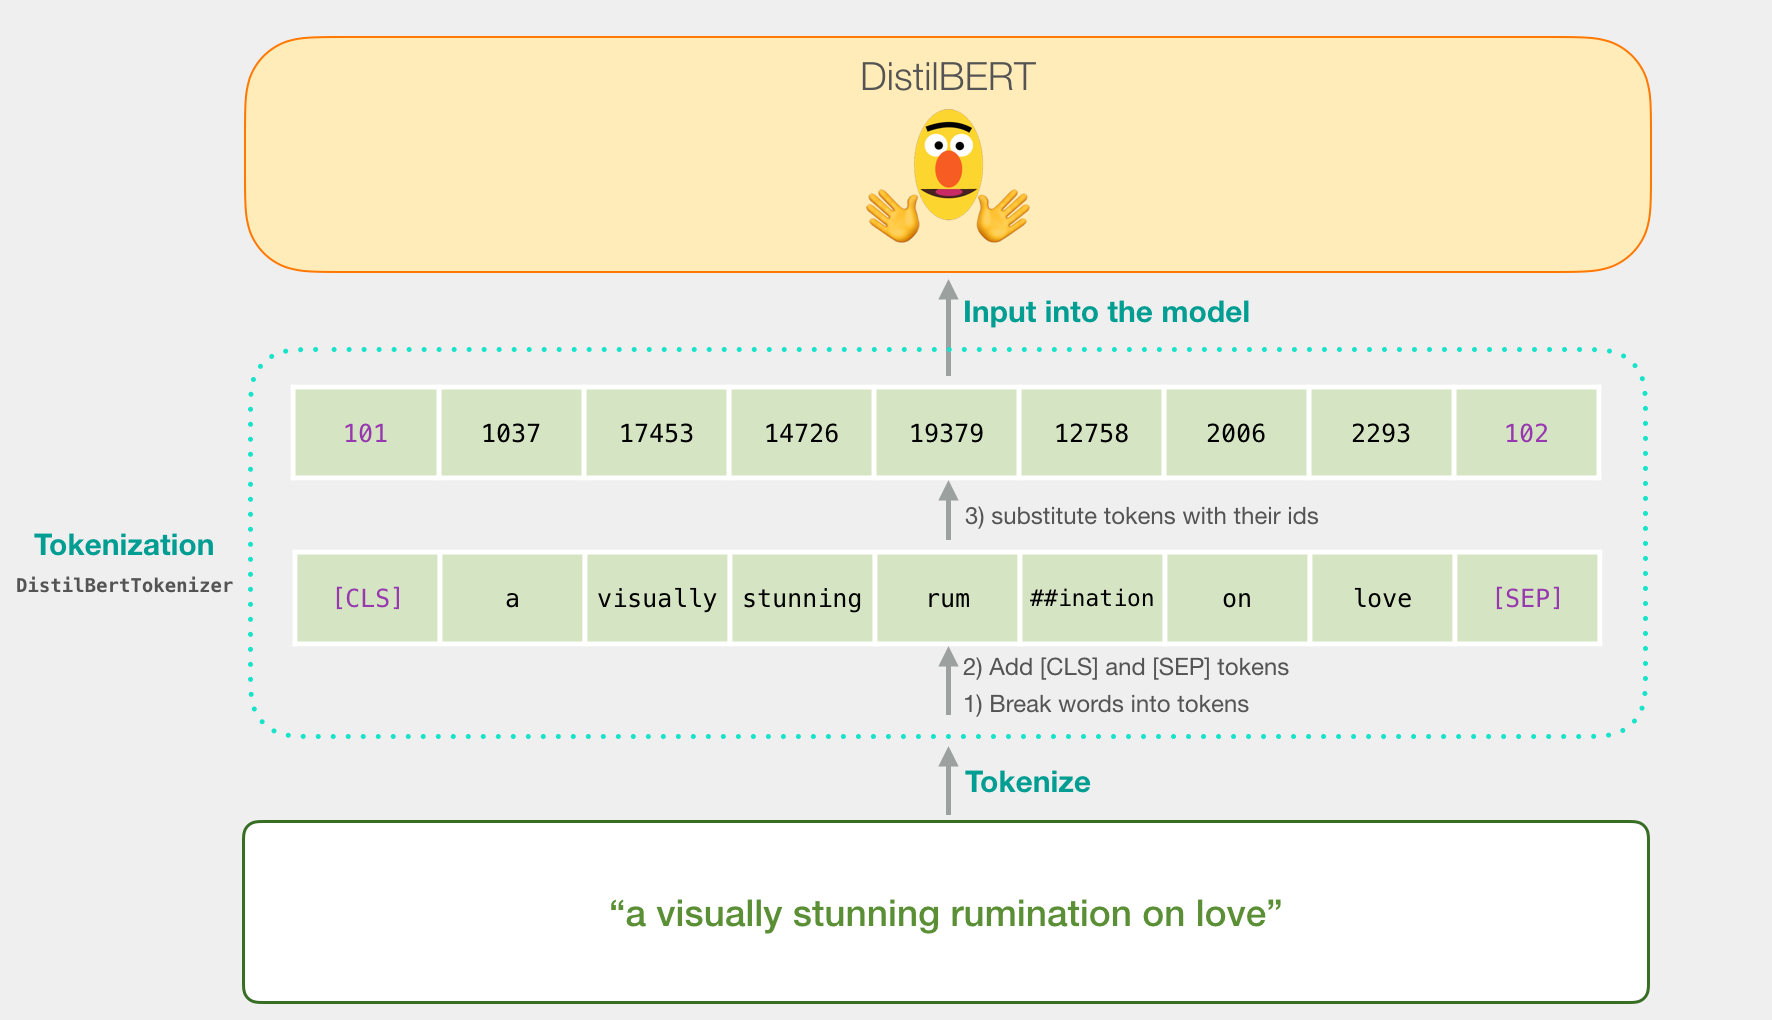

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

model_inputs = tokenizer(['Hello world!', 'how are you?'], padding="max_length", max_length=8, return_tensors="pt")
model_inputs

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 8667, 1362,  106,  102,    0,    0,    0],
        [ 101, 1293, 1132, 1128,  136,  102,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0]])}

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Hello world!")

{'input_ids': [101, 8667, 1362, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
# Дополнение последовательностей до заданной максимальной длины
model_inputs = tokenizer(['Hello metaworld!', 'how are you?'], padding="max_length", max_length=8, return_tensors="pt")
model_inputs

{'input_ids': tensor([[  101,  8667, 27154, 13070,   106,   102,     0,     0],
        [  101,  1293,  1132,  1128,   136,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0]])}

In [ ]:
for token in model_inputs["input_ids"][0]:
    print(tokenizer.decode(token))

[CLS]
Hello
meta
##world
!
[SEP]
[PAD]
[PAD]


### Применение модели

In [ ]:
import torch

encoded_sequences = [
    [101, 1, 2, 3],
    [101, 4, 5, 6],
    [101, 7, 8, 9],
]

model_inputs = torch.tensor(encoded_sequences)
output = model(model_inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0550,  0.4889,  0.6843,  ...,  0.4833, -0.1339,  0.1375],
         [-0.3199,  0.2458,  0.9206,  ...,  0.2832, -0.0379, -0.0202],
         [-0.3361,  0.4504,  0.7557,  ...,  0.3800, -0.1795,  0.0087],
         [-0.2844,  0.5193,  0.7244,  ...,  0.3899, -0.1990, -0.0578]],

        [[-0.1662,  0.4021,  0.6357,  ...,  1.1998, -0.2972,  0.1872],
         [-0.1871, -0.2718,  0.4520,  ...,  0.5082,  0.1472, -0.0150],
         [-0.3827, -0.1240,  0.3554,  ...,  0.5148,  0.0864,  0.1534],
         [-0.2015,  0.4061,  0.6344,  ...,  1.1191, -0.2917,  0.1655]],

        [[ 0.0797,  0.4599,  0.7077,  ...,  0.7596, -0.1268,  0.1436],
         [-0.1902,  0.1036,  0.7702,  ...,  0.5177,  0.0821,  0.0061],
         [-0.2664,  0.3516,  0.8599,  ...,  0.7162, -0.1607, -0.0190],
         [ 0.0636,  0.4830,  0.7703,  ...,  0.7234, -0.1374,  0.1501]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.3868,  0.

In [ ]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()

233

# 3. Использование LLM из Python

Сейчас все основные SoTA-решения являются Closed-Source, и доступны только через веб-интерфейс, или через API с жесткими ограничениями. Удобно, если нужно прогнать несколько вопросов - попробуйте сами.


- OpenAI API (через VPN) - [openai.com/api](https://openai.com/api/)
- Chatbot Arena (удобный способ попробовать топовые LLMки, но с очень строгими ограничениями) - [chat.lmsys.org](https://chat.lmsys.org)
- YandexGPT Lite/Pro (поддерживает дообучение) - [console.yandex.cloud](https://console.yandex.cloud/folders/b1g4lgsfdsvocob346tv/foundation-models/overview)
- GigaChat API (без дообучения) - [developers.sber.ru](https://developers.sber.ru/docs/ru/gigachat/api/overview)


Но в демо-режиме особо не разгонишься, и ничего не автоматизируешь. Для масштабного применения придется платить за доступ к API. Как быть, если хотим классные модели, но бесплатно?

### Open-Source модели

К счастью, тут спасают модели с открытым исходным кодом. Удобнее всего их искать на [HuggingFace](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending) или на уже упомянутом [ChatBot Arena](https://chat.lmsys.org) - во вкладке LeaderBoard искать модели с открытыми лицензиями. Примеры:

- [ruGPT-3.5](https://huggingface.co/ai-forever/ruGPT-3.5-13B)
- [GigaChat-20B-A3B-instruct](https://huggingface.co/ai-sage/GigaChat-20B-A3B-instruct)
- [Meta-Llama-3-8B](https://huggingface.co/meta-llama/Meta-Llama-3-8B) (требует HF token)
- [Mistral-7B-Instruct](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2) (требует HF token)

Будем работать со следующими моделями:

-   [Qwen2.5-7B](https://huggingface.co/Qwen/Qwen2.5-7B)
-   [OpenChat-3.5](https://huggingface.co/openchat/openchat-3.5-0106)
-   [gpt2](https://huggingface.co/openai-community/gpt2)



### Загрузка модели

Давайте попробуем подгрузить и использовать такую модель. Сразу предупреждаю - мы будем мучать GPU, беспощадно. Не забудьте поставить GPU в среде выполнения.

In [ ]:
!nvidia-smi

Mon Sep 15 17:27:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P0             28W /   70W |    1554MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import transformers

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model_name = 'openchat/openchat-3.5-0106'

tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device)
tokenizer.pad_token_id = tokenizer.eos_token_id

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map='auto',
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    offload_state_dict=True,
)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Можем заметить, что мы уже заняли 13 ГБ из доступных 15. Далее действовать нужно очень осторожно.

In [ ]:
!nvidia-smi

Sun Sep 14 09:48:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             29W /   70W |   13042MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Генерация

Вспомним, что под капотом это все еще просто генеративная модель, которая предсказывает вероятности следующих токенов. Что делать с этими вероятностями дальше - можно определить с помощью стратегии генерации.

| Стратегия | Описание | Плюсы и минусы |
| --- | --- | --- |
| Greedy Search | Выбирает слово с наивысшей вероятностью как следующее слово в последовательности. | Плюсы: Простота и скорость.<br> Минусы: Может привести к повторяющемуся и несвязному тексту. |
| Семплинг с температурой | Добавляет случайность в выбор слова. Большая температура приводит к большей случайности. | Плюсы: Позволяет исследовать и получать разнообразный результат.<br> Минусы: Высокие температуры могут привести к бессмысленным результатам. |
| Семплинг по ядру (Top-p семплинг) | Выбирает следующее слово из усеченного словаря, "ядра" слов, которые имеют суммарную вероятность, превышающую предустановленный порог (p). | Плюсы: Обеспечивает баланс между разнообразием и качеством.<br> Минусы: Настройка оптимального 'p' может быть затруднительна. |
| Beam Search | Исследует множество гипотез (последовательностей слов) на каждом шаге и сохраняет 'k' наиболее вероятных, где 'k' - ширина луча. | Плюсы: Дает более надежные результаты, чем жадный поиск.<br> Минусы: Может страдать от нехватки разнообразия и приводить к общим ответам. |
| Top-k семплинг | Случайным образом выбирает следующее слово из 'k' слов с самыми высокими вероятностями. | Плюсы: Вводит случайность, увеличивая разнообразие результатов.<br> Минусы: Случайный выбор иногда может привести к менее связному тексту. |
| Нормализация длины | Предотвращает предпочтение модели более коротких последовательностей за счет деления логарифмированных вероятностей на длину последовательности, возведенную в некоторую степень. | Плюсы: Делает более длинные и потенциально более информативные последовательности более вероятными.<br> Минусы: Настройка фактора нормализации может быть сложной. |
| Стохастический Beam Search | Вводит случайность в процесс выбора 'k' гипотез в поиске пучком. | Плюсы: Увеличивает разнообразие в сгенерированном тексте.<br> Минусы: Баланс между разнообразием и качеством может быть сложно управлять. |
| Декодирование с минимальным риском Байеса (MBR) | Выбирает гипотезу (из многих), которая минимизирует ожидаемую потерю для функции потерь. | Плюсы: Оптимизирует результат в соответствии с определенной функцией потерь.<br> Минусы: Вычислительно более сложно и требует хорошо подобранную функциию потерь. |

Референсы:
- [Документация `AutoModelForCausalLM.generate()`](https://huggingface.co/docs/transformers/v4.29.1/en/main_classes/text_generation#transformers.GenerationMixin.generate)
- [Документация `AutoTokenizer.decode()`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.decode)
- [Статья о стратегиях генерации на Huggingface](https://huggingface.co/docs/transformers/generation_strategies)

In [ ]:
prompt = 'The first known form of life on Mars looked like'
batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)
print("Input batch (encoded):", batch)

Input batch (encoded): {'input_ids': tensor([[    1,   415,   907,  2651,  1221,   302,  1411,   356, 15798,  2382,
           737]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}


Greedy Search

In [ ]:
output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=False)

print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))


Output: <s>The first known form of life on Mars looked like a cross between a mushroom and a sea sponge, according to a new study.

The study, published in the journal Nature, suggests that the first life on Mars was a type of microbial mat, which is a community of microorganisms that live together in a thin layer of slime


# Sampling with temperature

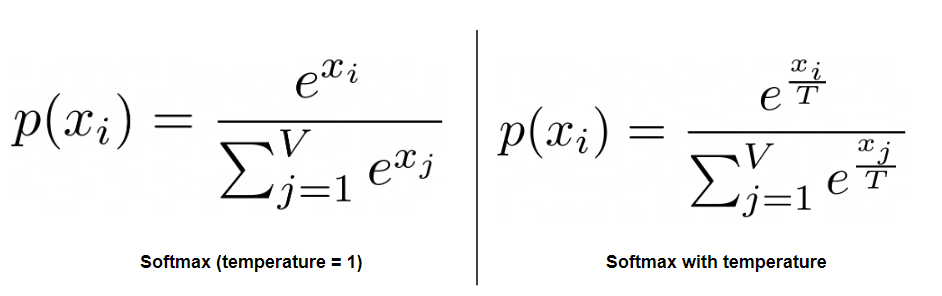

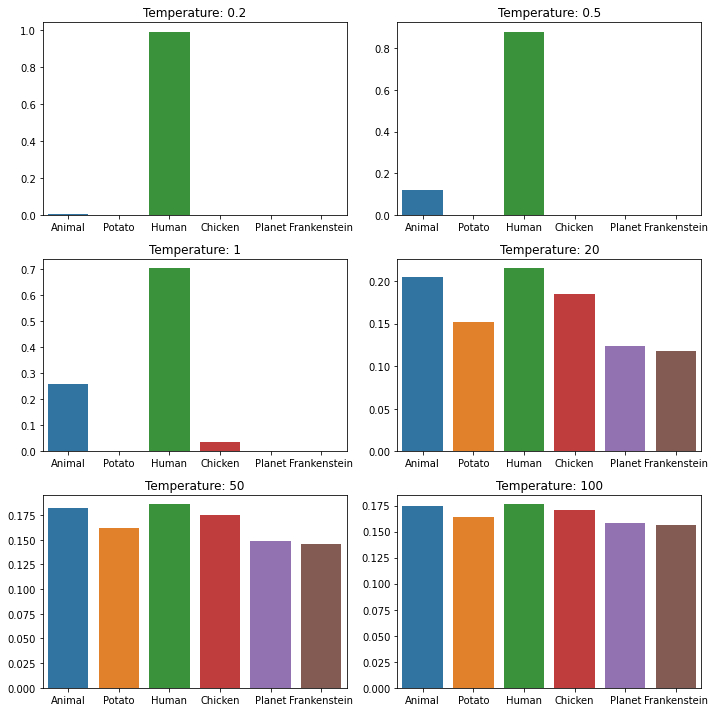

Семплинг с температурой

In [ ]:
output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=True, temperature=5.)

print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))


Output: <s>The first known form of life on Mars looked like the above picture because research has soley suggested its an older landscape while photos provided by ESA- roving robbers exploring are no clear sign  and may show older Mars terrain being photons emmitted bv radio ather, but even at present Mars remains relatively lifeline for such things has now yet discovered so


Top-K семплинг

In [ ]:
output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=True, temperature=0.7, top_k=50)

print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))


Output: <s>The first known form of life on Mars looked like a ball of moss, so it's no surprise that the Red Planet's environment might contain some of the building blocks of life. But scientists are still digging into the mysteries of how life might have emerged on Earth, and the same could be true for the search for extraterrestrial life.


Beam Search

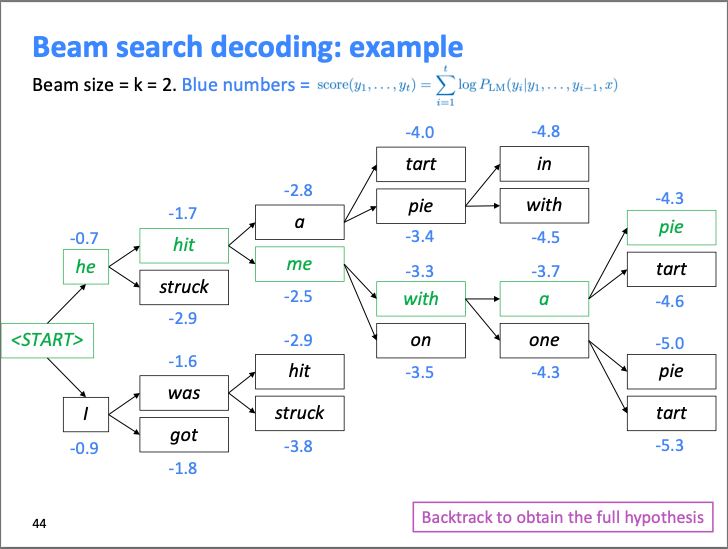

In [ ]:
output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=False, num_beams=3)

print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))


Output: <s>The first known form of life on Mars looked like a cross between a mushroom and a sea anemone, according to a new study.

The study, published in the journal Nature, suggests that life on the Red Planet began around 3.5 billion years ago, when the planet was much warmer and wetter than it is today.

